In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay, confusion_matrix

In [ ]:
data_path = "/content/drive/MyDrive/TrainData"
data_path_noclass = "/content/drive/MyDrive/TestData_nolabel"

In [ ]:
data = []

for subfolder in os.listdir(data_path):
    subfolder_path = os.path.join(data_path, subfolder)
    if os.path.isdir(subfolder_path):
        for file_name in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file_name)
            if file_name.endswith(".txt"):
                with open(file_path, "r") as file:
                    content = file.read()
                    data.append({"Sentences": content, "Class": subfolder})

df = pd.DataFrame(data)
df = df.sample(frac=1, random_state=10).reset_index(drop=True)

In [ ]:
df

,Sentences,Class
0,Subject: spanish terms\n\nam looking spanish t...,notspam
1,Subject: accent allowed !\n\nhas anybody else ...,notspam
2,Subject: george aditjondro\n\ndr george aditjo...,notspam
3,"Subject: philosophy mind\n\ndear linguist , gr...",notspam
4,Subject: question ssc\n\n' m stumped presence ...,notspam
...,...,...
206,"Subject: special issues\n\nnames , journal ame...",notspam
207,"Subject: postings\n\nhi , ' m working phonetic...",notspam
208,"Subject: \n\ncomes porn , site does n't mess a...",spam
209,Subject: translator\n\norder forms translator ...,notspam


In [ ]:
data_noclass = []

for file_name in os.listdir(data_path_noclass):
    file_path = os.path.join(data_path_noclass, file_name)
    if file_name.endswith(".txt"):
        with open(file_path, "r") as file:
            content = file.read()
            sts = file_name.split('_')
            data_noclass.append({"num": int(sts[0]),"File name":file_name,"Sentences": content, "Class": None})

data_noclass = sorted(data_noclass, key=lambda x:x['num'])
df_noclass = pd.DataFrame(data_noclass)
df_noclass = df_noclass.drop(['num'],axis=1)

In [ ]:
df_noclass

,File name,Sentences,Class
0,0_unknown.txt,Subject: base generated adjuncts\n\ndoes anyon...,None
1,1_unknown.txt,Subject: basic journals\n\nare facing major cu...,None
2,2_unknown.txt,Subject: query : tagalog philippine informants...,None
3,3_unknown.txt,Subject: ancient vocal tract simulation\n\nwor...,None
4,4_unknown.txt,"Subject: re : 3 . 386 chomsky , mac concordanc...",None
...,...,...,...
73,73_unknown.txt,Subject: really cool hot videos !\n\nattention...,None
74,74_unknown.txt,"Subject: improvements wound care !\n\nhello , ...",None
75,75_unknown.txt,Subject: \n\nb r g n r f r e s 1 - stop travel...,None
76,76_unknown.txt,"Subject: credit program "" guaranteed credit ""\...",None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentences  211 non-null    object
 1   Class      211 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB


In [ ]:
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates(keep = 'first')

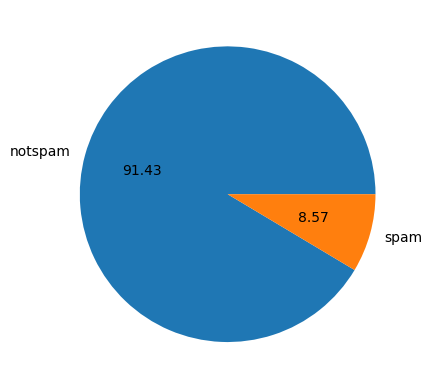

In [ ]:
plt.pie(df['Class'].value_counts(), labels=['notspam','spam'],autopct="%0.2f")
plt.show()

### tiền xử lý dữ liệu

In [ ]:
sentences = list(df['Sentences'])

In [ ]:
sentences_2 = []
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_data(text):
  text = text.replace('\n',' ')

  text = re.sub(r'http\s+',"",text)

  text = re.sub(r'[^0-9a-zA-Z]',' ',text)

  text = text.lower()

  text = text.split()
  text = [word for word in text if word not in stopwords.words('english')]

  text = [lemmatizer.lemmatize(word) for word in text]
  text = ' '.join(text)
  return text;

In [ ]:
for i in range(len(sentences)):
  text = clean_data(sentences[i])
  sentences_2.append(text)

In [ ]:
df['Sentences']= sentences_2
df

<ipython-input-119-4c80253cf393>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentences']= sentences_2


,Sentences,Class
0,subject spanish term looking spanish translati...,notspam
1,subject accent allowed anybody else seen weird...,notspam
2,subject george aditjondro dr george aditjondro...,notspam
3,subject philosophy mind dear linguist group pa...,notspam
4,subject question ssc stumped presence dash def...,notspam
...,...,...
205,subject summary animal thank wrote concerning ...,notspam
207,subject posting hi working phonetics project m...,notspam
208,subject come porn site n mess around dish mout...,spam
209,subject translator order form translator short...,notspam


### chia train data, test data

In [ ]:
X = df['Sentences']
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

In [ ]:
# chuyển vector
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

### chọn model tốt nhất

In [ ]:
# Tạo danh sách các mô hình cần đánh giá
models = [
    ('Support Vector Machine', SVC()),
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', MultinomialNB()),

]
# Lặp qua từng mô hình và tính accuracy và f1 score trung bình
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_mean = np.mean(scores)

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    f1_score_mean = np.mean(scores)
    print(f"Model: {name}, Accuracy: {accuracy_mean}, F1 Score: {f1_score_mean}, \n")


# Chọn mô hình có accuracy và f1 score cao nhất
best_model = max(models, key=lambda x: np.mean(cross_val_score(x[1], X_train, y_train, cv=5, scoring='accuracy')))
print(f"Mô hình tốt nhất: {best_model[0]}")

Model: Support Vector Machine, Accuracy: 0.9228163992869876, F1 Score: 0.4799038461538462, 

Model: Logistic Regression, Accuracy: 0.9228163992869876, F1 Score: 0.4799038461538462, 

Model: Random Forest, Accuracy: 0.9228163992869876, F1 Score: 0.4799038461538462, 

Model: Naive Bayes, Accuracy: 0.9228163992869876, F1 Score: 0.4799038461538462, 

Mô hình tốt nhất: Support Vector Machine


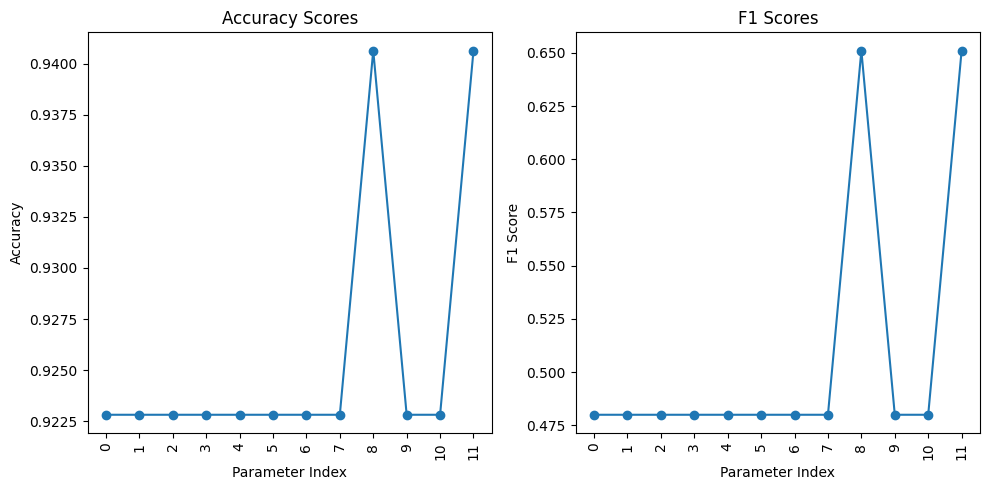

Vị trí của phần tử max đầu tiên xuất hiện: 8


In [ ]:
# chọn tham số tốt nhất
C_values = [0.1, 1, 10]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
max_iter = 10000

svm_accuracies = []
svm_f1_scores = []

for C in C_values:
    for kernel in kernels:
        # Tạo bộ phân loại SVM với các tham số tương ứng
        classifier = SVC(kernel=kernel, C=C, max_iter=max_iter)

        # Sử dụng cross_val_score để thực hiện cross-validation và đánh giá hiệu suất
        svm_accuracy = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
        svm_f1 = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1_macro')

        # Lưu trung bình của các điểm số cross-validation vào list
        svm_accuracies.append(np.mean(svm_accuracy))
        svm_f1_scores.append(np.mean(svm_f1))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(len(svm_accuracies)), svm_accuracies, marker='o')
plt.title('Accuracy Scores')
plt.xlabel('Parameter Index')
plt.ylabel('Accuracy')
plt.xticks(range(len(svm_accuracies)), rotation=90)

plt.subplot(1, 2, 2)
plt.plot(range(len(svm_f1_scores)), svm_f1_scores, marker='o')
plt.title('F1 Scores')
plt.xlabel('Parameter Index')
plt.ylabel('F1 Score')
plt.xticks(range(len(svm_f1_scores)), rotation=90)

plt.tight_layout()
plt.show()

# Tìm giá trị lớn nhất của f1_Score trong svm_accuracies
max_index = np.argmax(svm_f1_scores)

# In ra vị trí của phần tử max đầu tiên xuất hiện
print("Vị trí của phần tử max đầu tiên xuất hiện:", max_index)

In [ ]:
classifier = SVC(kernel='linear', C=10, max_iter=1000)
classifier.fit(X_train, y_train)

SVC(C=10, kernel='linear', max_iter=1000)

In [ ]:
pre = classifier.predict(X_test)

print(f'score: {classifier.score(X_test,y_test)}')

score: 0.9285714285714286


In [ ]:
tests =list(df_noclass['Sentences'])
tests_2 = []
for i in range(len(tests)):
  text = clean_data(tests[i])
  tests_2.append(text)

test_data = vectorizer.transform(tests_2)
pre_data = classifier.predict(test_data)
pre_data

array(['notspam', 'notspam', 'notspam', 'notspam', 'notspam', 'notspam',
       'notspam', 'notspam', 'notspam', 'notspam', 'notspam', 'notspam',
       'notspam', 'notspam', 'notspam', 'notspam', 'notspam', 'notspam',
       'notspam', 'notspam', 'notspam', 'notspam', 'notspam', 'notspam',
       'notspam', 'notspam', 'notspam', 'notspam', 'notspam', 'notspam',
       'notspam', 'notspam', 'notspam', 'notspam', 'notspam', 'notspam',
       'notspam', 'notspam', 'notspam', 'notspam', 'notspam', 'notspam',
       'notspam', 'notspam', 'notspam', 'notspam', 'notspam', 'notspam',
       'notspam', 'spam', 'spam', 'spam', 'spam', 'notspam', 'spam',
       'notspam', 'spam', 'spam', 'notspam', 'spam', 'spam', 'notspam',
       'notspam', 'spam', 'spam', 'notspam', 'notspam', 'spam', 'spam',
       'notspam', 'spam', 'spam', 'spam', 'spam', 'spam', 'notspam',
       'notspam', 'spam'], dtype=object)

In [ ]:
np.count_nonzero(pre_data == 'spam')

19

In [ ]:
result = pd.DataFrame({'Class' : pre_data})
result = pd.concat([df_noclass['File name'], result], axis =1)
result

,File name,Class
0,0_unknown.txt,notspam
1,1_unknown.txt,notspam
2,2_unknown.txt,notspam
3,3_unknown.txt,notspam
4,4_unknown.txt,notspam
...,...,...
73,73_unknown.txt,spam
74,74_unknown.txt,spam
75,75_unknown.txt,notspam
76,76_unknown.txt,notspam


In [ ]:
result.to_csv('result.csv', index=False)